In [0]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
df = pd.read_csv('/content/city_day.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
#df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
26214,Thiruvananthapuram,2020-04-27,14.13,34.27,5.60,8.98,12.48,5.65,0.49,5.50,42.41,NaN,NaN,NaN,63.0,Satisfactory
26215,Thiruvananthapuram,2020-04-28,23.84,44.32,6.27,10.01,13.80,5.73,0.44,5.62,44.55,NaN,NaN,NaN,60.0,Satisfactory
26216,Thiruvananthapuram,2020-04-29,18.54,34.48,6.17,9.67,13.35,5.93,0.51,5.52,38.97,NaN,NaN,NaN,57.0,Satisfactory
26217,Thiruvananthapuram,2020-04-30,20.57,48.19,6.28,9.52,13.56,5.84,0.46,5.32,39.23,NaN,NaN,NaN,57.0,Satisfactory
26218,Thiruvananthapuram,2020-05-01,17.58,37.49,2.56,7.84,9.34,4.85,0.45,7.10,31.16,NaN,NaN,NaN,82.0,Satisfactory


In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4289
PM10          10766
NO             3233
NO2            3217
NOx            4043
NH3            9847
CO             1961
SO2            3544
O3             3660
Benzene        5287
Toluene        7555
Xylene        16807
AQI            4282
AQI_Bucket     4282
dtype: int64

In [6]:
df.shape

(26219, 16)

In [7]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [0]:
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace= True)
df['NO'].fillna(df['NO'].mean(), inplace= True)
df['NO2'].fillna(df['NO2'].mean(), inplace= True)
df['NOx'].fillna(df['NOx'].mean(), inplace= True)
df['NH3'].fillna(df['NH3'].mean(), inplace= True)
df['CO'].fillna(df['CO'].mean(), inplace= True)
df['SO2'].fillna(df['SO2'].mean(), inplace= True)
df['O3'].fillna(df['O3'].mean(), inplace= True)
df['Benzene'].fillna(df['Benzene'].mean(), inplace= True)
df['Toluene'].fillna(df['Toluene'].mean(), inplace= True)
df['Xylene'].fillna(df['Xylene'].mean(), inplace= True)
df['AQI'].fillna(df['AQI'].mean(), inplace= True)

In [0]:
df  = df.drop(['AQI_Bucket','PM10'], axis = 1)

In [10]:
df.isnull().sum()

City       0
Date       0
PM2.5      0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
df = df.sort_index()


In [13]:
df.head()

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,71.828907,0.92,18.22,17.15,25.336162,0.92,27.64,133.36,0.00,0.02,0.00,175.840908
1,Ahmedabad,2015-01-02,71.828907,0.97,15.69,16.46,25.336162,0.97,24.55,34.06,3.68,5.50,3.77,175.840908
2,Ahmedabad,2015-01-03,71.828907,17.40,19.30,29.70,25.336162,17.40,29.07,30.70,6.80,16.40,2.25,175.840908
3,Ahmedabad,2015-01-04,71.828907,1.70,18.48,17.97,25.336162,1.70,18.59,36.08,4.43,10.14,1.00,175.840908
4,Ahmedabad,2015-01-05,71.828907,22.10,21.42,37.76,25.336162,22.10,39.33,39.31,7.01,18.89,2.78,175.840908


In [14]:
df['City'].value_counts()

Ahmedabad             1948
Mumbai                1948
Bengaluru             1948
Chennai               1948
Delhi                 1948
Lucknow               1948
Hyderabad             1945
Patna                 1797
Gurugram              1618
Amritsar              1160
Jorapokhar            1108
Jaipur                1053
Thiruvananthapuram    1051
Amaravati              890
Brajrajnagar           877
Talcher                864
Kolkata                753
Guwahati               441
Shillong               249
Chandigarh             243
Bhopal                 228
Kochi                  101
Ernakulam              101
Aizawl                  52
Name: City, dtype: int64

# Forecasting for lucknow

before corona

In [0]:
df_lucknow= df[df['City'] == 'Lucknow']
df_lucknow = df_lucknow.drop('City' , axis = 1)
df_lucknow.set_index('Date', inplace=True)


In [16]:
df_lucknow.shape

(1948, 12)

In [17]:
df_lucknow.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2015-01-01,71.828907,2.11,13.46,4.57,25.336162,12.15,169.57,25.92,1.35,3.93,3.155895,175.840908
2015-01-02,71.828907,2.37,10.76,3.80,25.336162,14.00,169.46,21.66,1.97,5.74,3.155895,175.840908
2015-01-03,71.828907,2.27,12.43,4.22,25.336162,12.78,169.77,22.40,1.83,4.76,3.155895,175.840908
2015-01-04,71.828907,2.24,12.46,4.22,25.336162,11.85,169.56,21.41,2.27,4.77,3.155895,175.840908
2015-01-05,71.828907,2.32,12.27,4.22,25.336162,13.34,169.48,20.60,2.49,4.78,3.155895,175.840908


In [0]:
df_lucknow_before_covid = df_lucknow.loc['2016-01-01' : '2020-03-23' ]
df_lucknow_after_covid = df_lucknow.loc['2020-03-24' : ]

In [19]:
df_lucknow_before_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2016-01-01,203.43,11.64,13.27,2.68,25.336162,3.40,6.53,38.97,0.23,0.69,3.155895,375.0
2016-01-02,188.05,7.22,14.56,3.37,25.336162,2.49,4.82,40.81,0.23,0.69,3.155895,366.0
2016-01-03,135.82,4.57,15.12,2.21,25.336162,2.58,5.49,50.04,0.33,0.98,3.155895,315.0
2016-01-04,137.98,8.89,15.24,2.21,25.336162,2.95,5.99,61.74,0.33,1.00,3.155895,304.0
2016-01-05,137.01,19.46,13.94,3.15,25.336162,4.69,8.53,47.95,0.26,0.78,3.155895,313.0


In [20]:
df_lucknow_before_covid.shape

(1544, 12)

In [0]:
df_lucknow_before_covid=  df_lucknow_before_covid.resample('W').mean()

In [22]:
df_lucknow_before_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2016-01-03,175.766667,7.810000,14.316667,2.753333,25.336162,2.823333,5.613333,43.273333,0.263333,0.786667,3.155895,352.000000
2016-01-10,141.864286,8.810000,13.025714,3.397143,25.336162,3.131429,6.698571,55.722857,13.664286,14.127143,3.155895,309.285714
2016-01-17,206.382857,5.748571,10.957143,3.705714,25.336162,3.094286,6.637143,37.017143,3.967218,7.398454,3.155895,366.714286
2016-01-24,223.375714,4.850000,11.565714,4.015714,25.336162,3.167143,6.840000,29.358571,16.444323,18.237084,3.155895,381.285714
2016-01-31,243.437143,6.047143,12.572857,4.688571,25.336162,1.774286,7.941429,43.135714,5.244323,12.321340,3.155895,397.285714


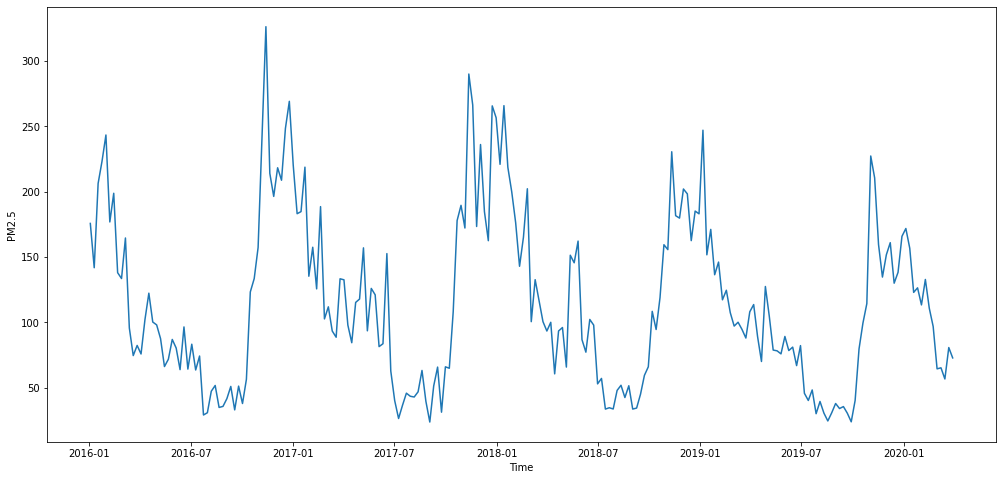

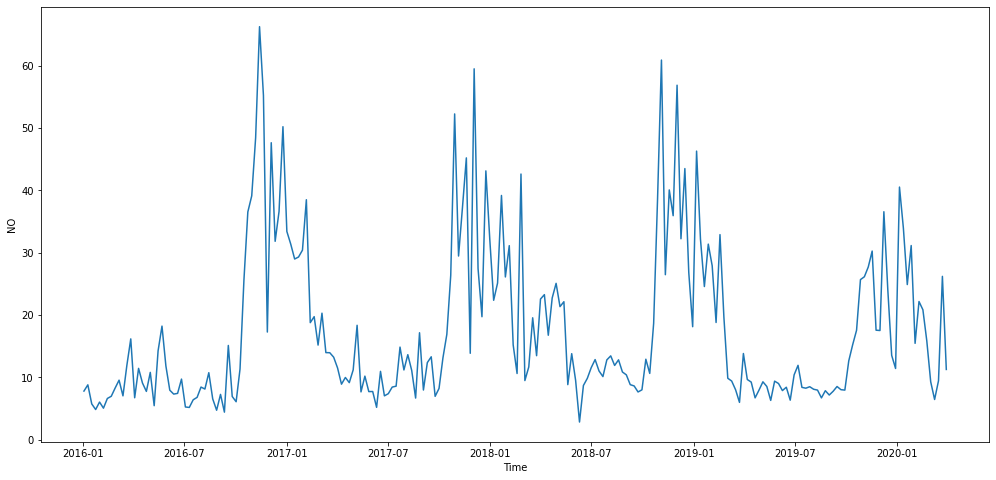

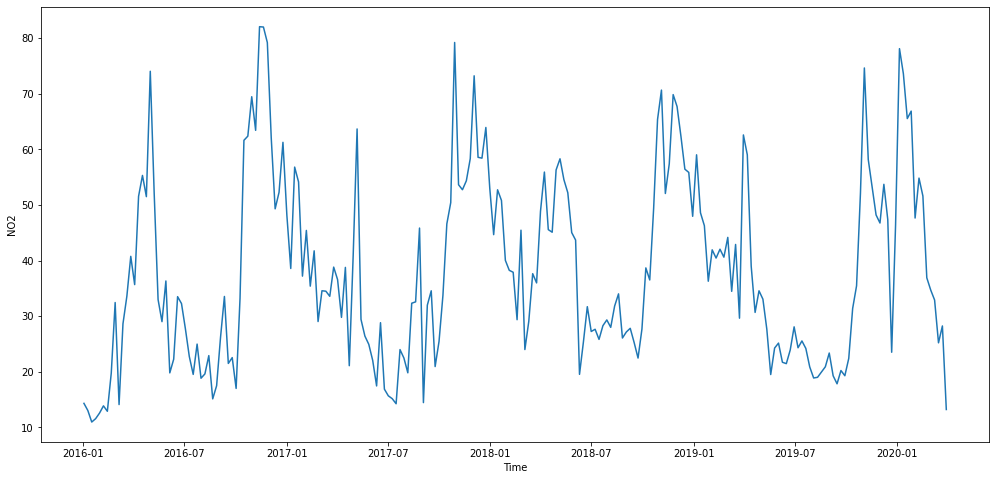

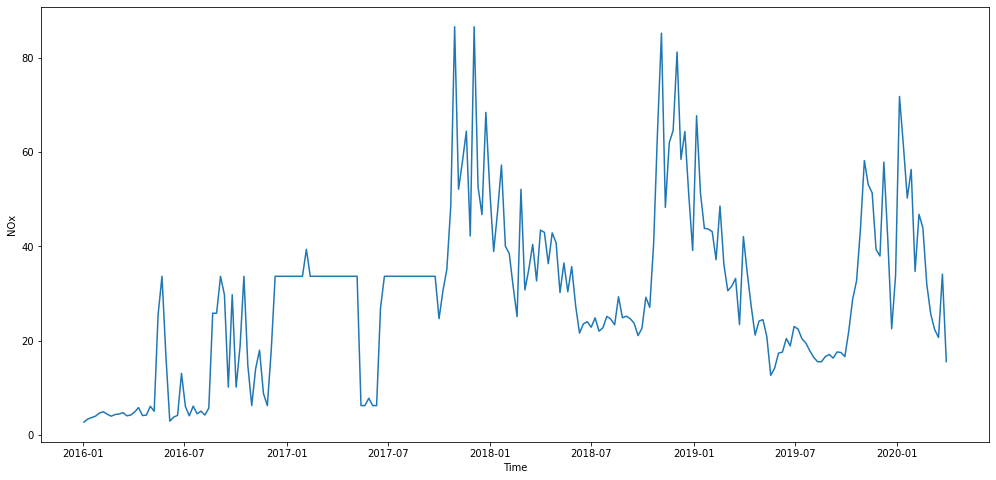

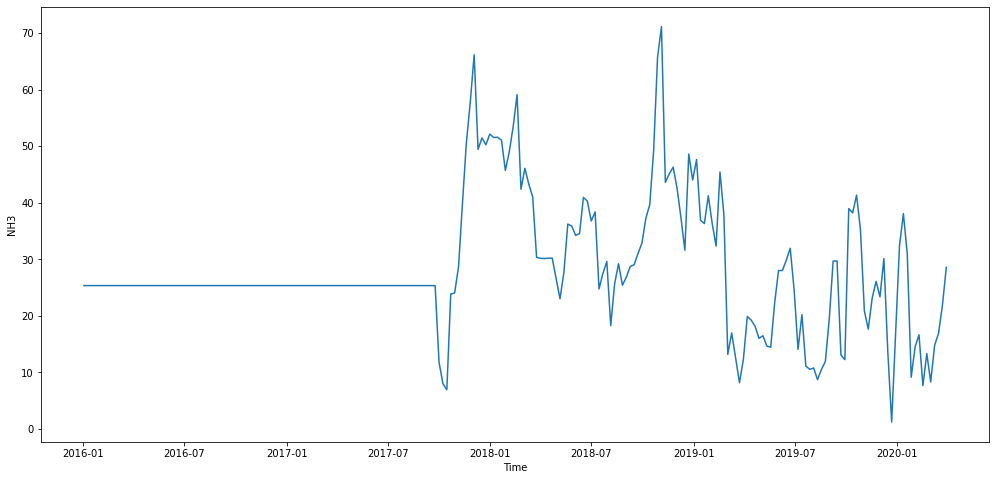

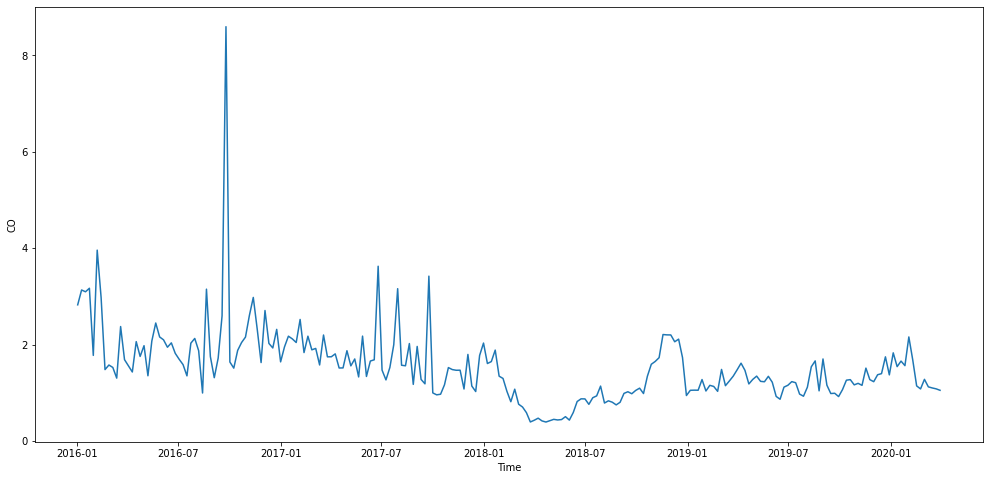

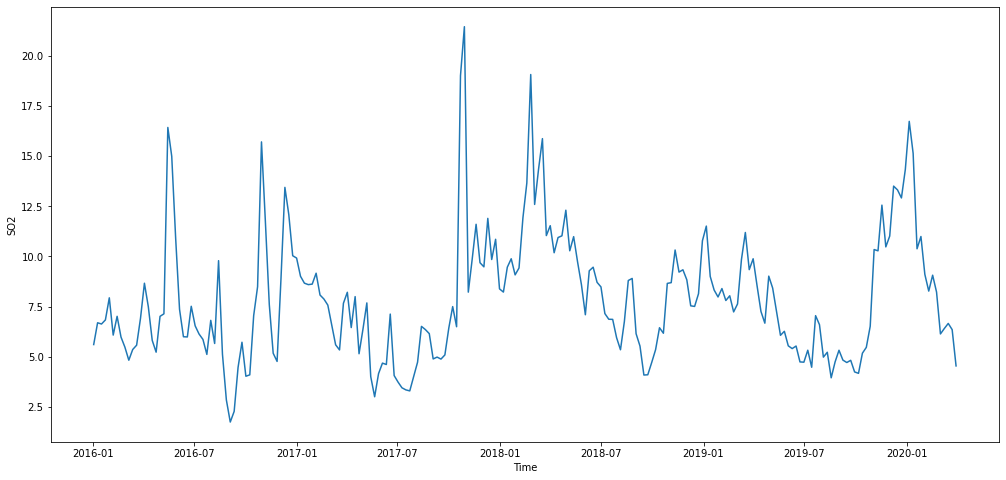

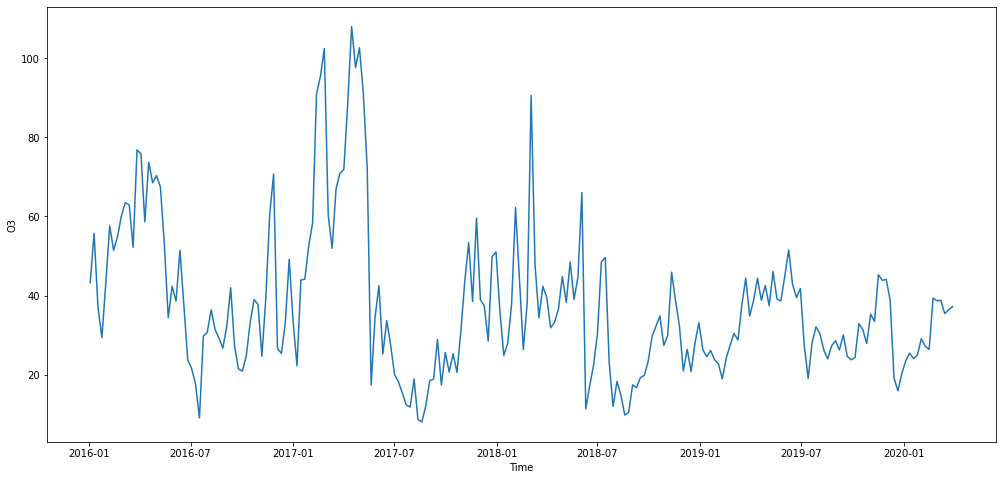

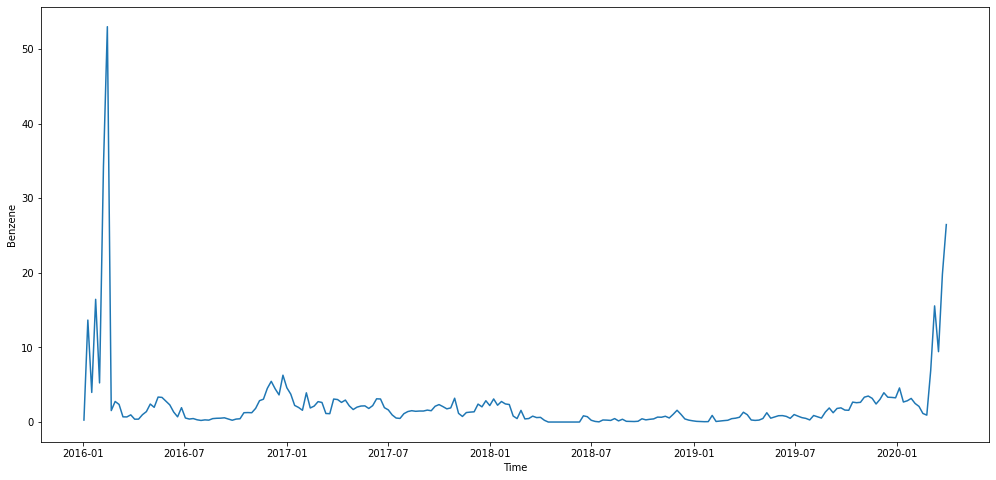

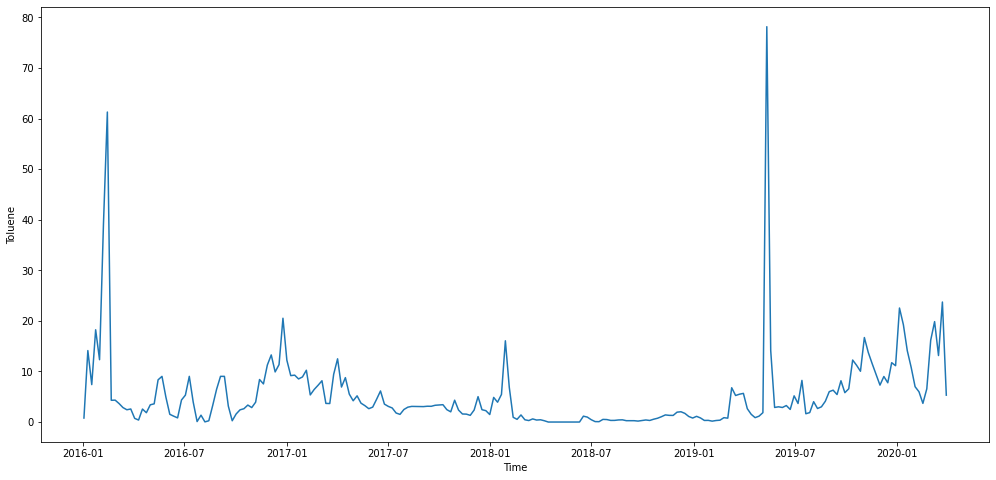

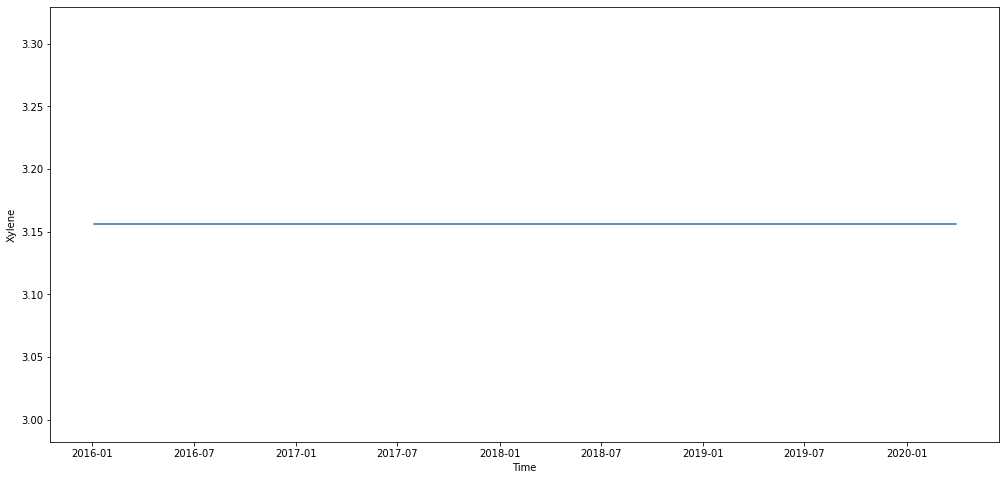

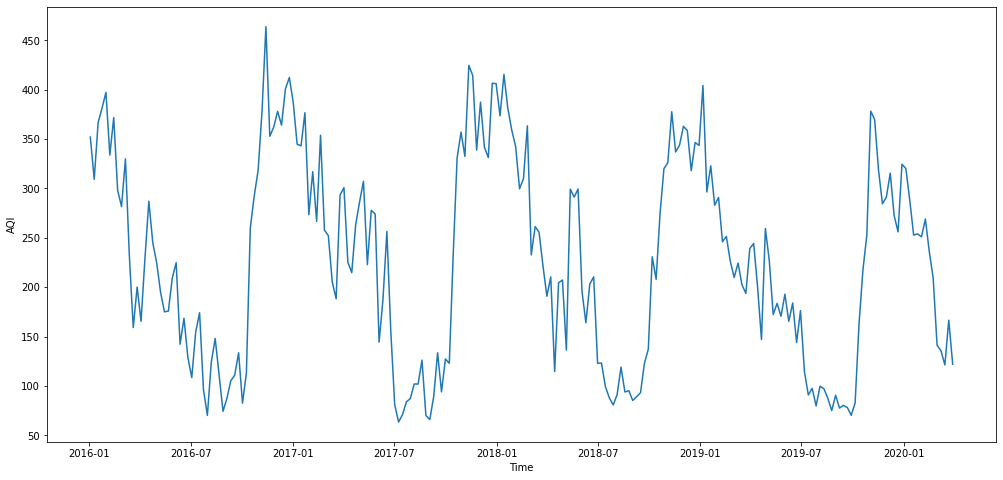

In [23]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df_lucknow_before_covid[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df_lucknow_before_covid.columns:
    plot_data(col)

In [24]:
df_lucknow_before_covid = df_lucknow_before_covid.reset_index()
df_lucknow_before_covid = df_lucknow_before_covid.rename({'Date':'ds','AQI':'y'} , axis = 1)
df_lucknow_before_covid.head(1)

,ds,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,y
0,2016-01-03,175.766667,7.81,14.316667,2.753333,25.336162,2.823333,5.613333,43.273333,0.263333,0.786667,3.155895,352.0


# Modeling on before dataset

In [0]:
train  = df_lucknow_before_covid

cols = train.columns.tolist()

In [0]:
cols = ['ds',
 'y', 
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene'
 ]

In [27]:
train = train[cols]
train_y = train[['ds','y']]
train_y.head(3)

,ds,y
0,2016-01-03,352.000000
1,2016-01-10,309.285714
2,2016-01-17,366.714286


In [0]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [0]:
m = Prophet()

In [0]:
#m.add_regressor('PM2.5')
#m.add_regressor('NO')
#m.add_regressor('NO2')
#m.add_regressor('NOx')
#m.add_regressor('NH3')
#m.add_regressor('CO')
#m.add_regressor('SO2')
#m.add_regressor('O3')
#m.add_regressor('Benzene')
#m.add_regressor('Toluene')
#m.add_regressor('Xylene')

In [31]:
m.fit(train_y)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = m.make_future_dataframe(periods= 365 )
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
582,2021-03-25,136.388863,74.030556,169.345790,133.280222,139.552634,-16.917623,-16.917623,-16.917623,-16.917623,-16.917623,-16.917623,0.0,0.0,0.0,119.471240
583,2021-03-26,136.289028,75.610338,161.462165,133.168727,139.468002,-16.594018,-16.594018,-16.594018,-16.594018,-16.594018,-16.594018,0.0,0.0,0.0,119.695010
584,2021-03-27,136.189193,76.673823,166.085837,133.057232,139.382421,-16.229073,-16.229073,-16.229073,-16.229073,-16.229073,-16.229073,0.0,0.0,0.0,119.960120
585,2021-03-28,136.089357,77.185000,166.218017,132.945737,139.296839,-15.839614,-15.839614,-15.839614,-15.839614,-15.839614,-15.839614,0.0,0.0,0.0,120.249744
586,2021-03-29,135.989522,77.486295,166.899029,132.834242,139.211258,-15.440906,-15.440906,-15.440906,-15.440906,-15.440906,-15.440906,0.0,0.0,0.0,120.548616


In [33]:
train_nox = train[['ds','NOx']]
train_nox = train_nox.rename({'NOx':'y'},axis=1)
m = Prophet()
m.fit(train_nox)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future = m.make_future_dataframe(periods= 365 )
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
582,2021-03-25,26.631055,12.641832,38.110481,24.816859,28.671626,-1.110277,-1.110277,-1.110277,-1.110277,-1.110277,-1.110277,0.0,0.0,0.0,25.520778
583,2021-03-26,26.620268,13.189523,39.083509,24.802295,28.672689,-0.811191,-0.811191,-0.811191,-0.811191,-0.811191,-0.811191,0.0,0.0,0.0,25.809077
584,2021-03-27,26.609481,12.026740,39.438394,24.784472,28.679955,-0.532568,-0.532568,-0.532568,-0.532568,-0.532568,-0.532568,0.0,0.0,0.0,26.076913
585,2021-03-28,26.598695,13.651462,39.018264,24.766150,28.682521,-0.280547,-0.280547,-0.280547,-0.280547,-0.280547,-0.280547,0.0,0.0,0.0,26.318147
586,2021-03-29,26.587908,13.121055,40.666115,24.752465,28.684196,-0.060470,-0.060470,-0.060470,-0.060470,-0.060470,-0.060470,0.0,0.0,0.0,26.527438


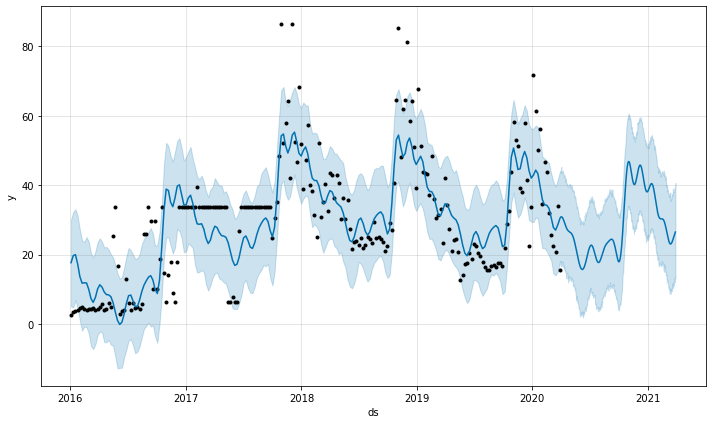

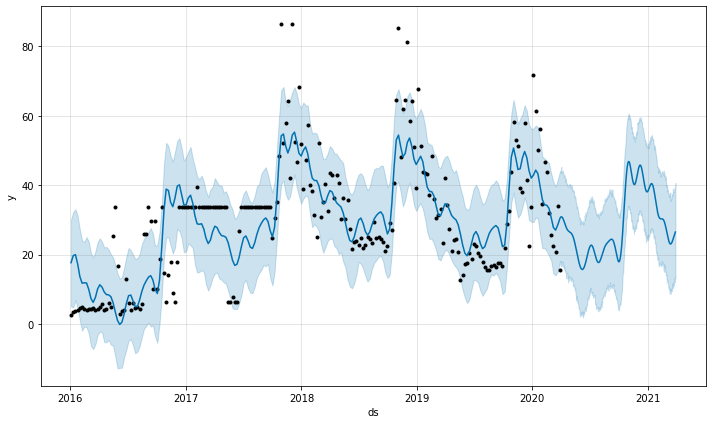

In [35]:
m.plot(forecast)

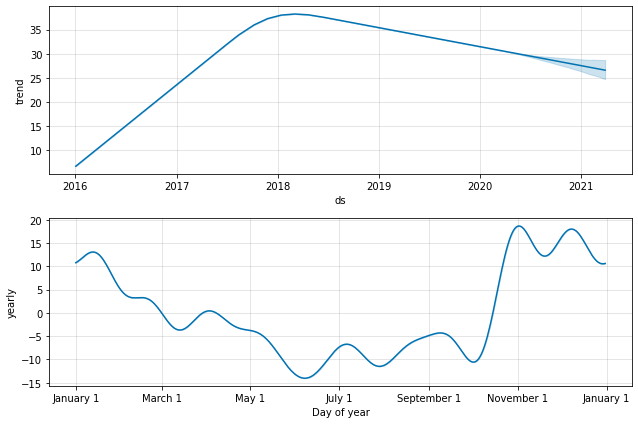

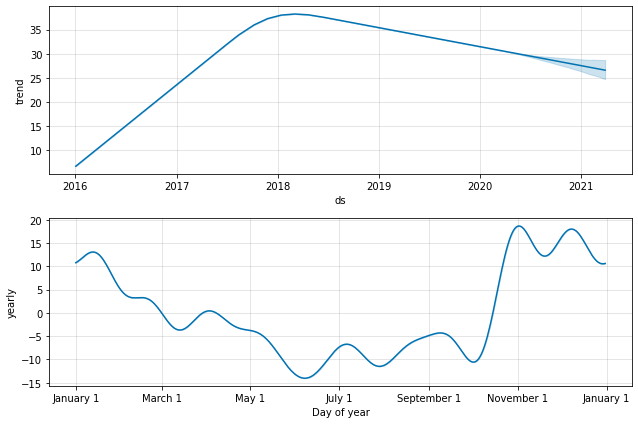

In [36]:
m.plot_components(forecast)

In [37]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(train_nox, forecast)

cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-03,17.693598,5.047499,30.173016,2.753333
2016-01-10,19.732368,4.851366,32.322791,3.397143
2016-01-17,20.009339,6.927880,33.074369,3.705714
2016-01-24,17.304777,4.395372,31.172522,4.015714
2016-01-31,13.668552,0.970662,27.125660,4.688571


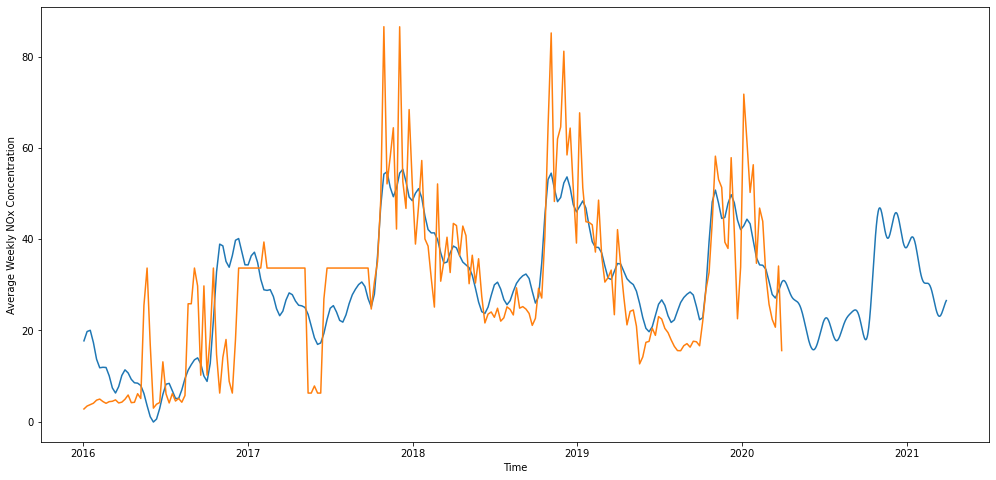

In [38]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])

plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
plt.show()


# **During corona**

In [39]:
df_lucknow_after_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2020-03-24,100.15,11.93,16.12,17.97,28.31,1.07,4.60,34.65,38.68,9.06,3.155895,207.0
2020-03-25,88.32,9.75,13.21,14.18,32.24,0.99,4.89,31.82,46.00,9.04,3.155895,237.0
2020-03-26,45.41,7.12,8.30,9.05,37.42,1.01,6.54,37.84,20.32,2.53,3.155895,108.0
2020-03-27,45.85,10.59,8.91,12.92,30.36,1.00,7.84,25.53,5.48,1.02,3.155895,77.0
2020-03-28,35.31,11.30,10.39,12.15,31.79,1.01,4.93,32.18,6.93,2.84,3.155895,73.0


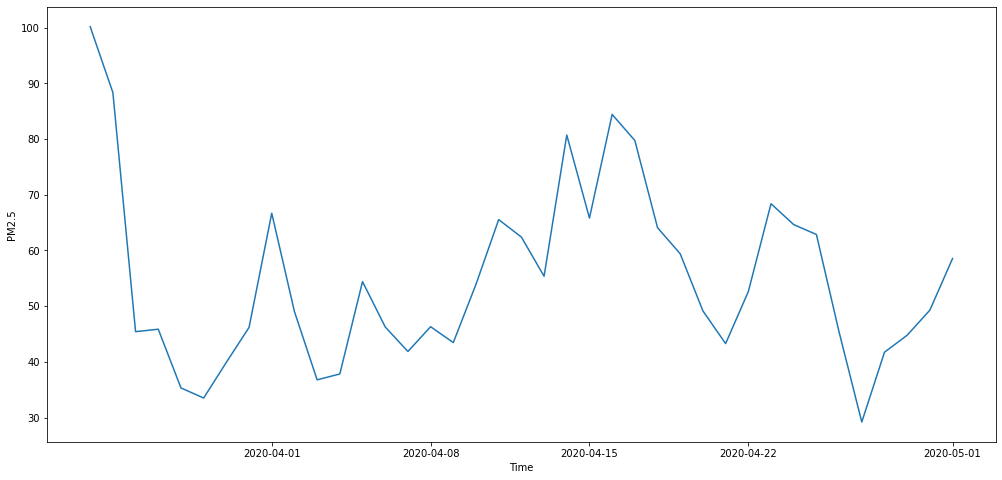

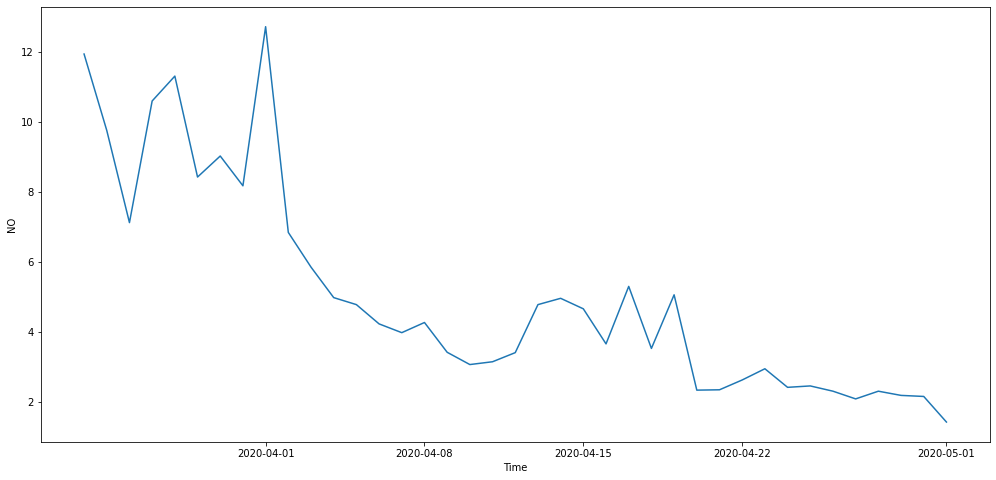

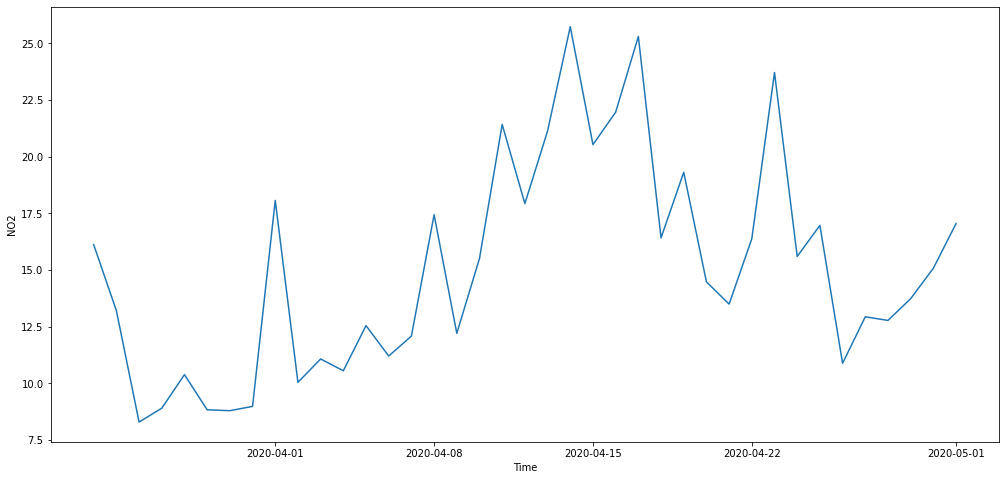

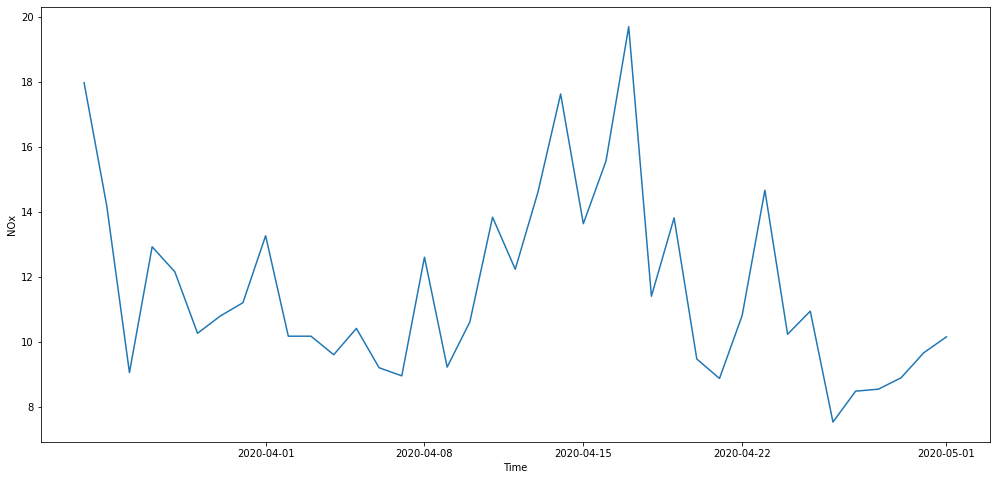

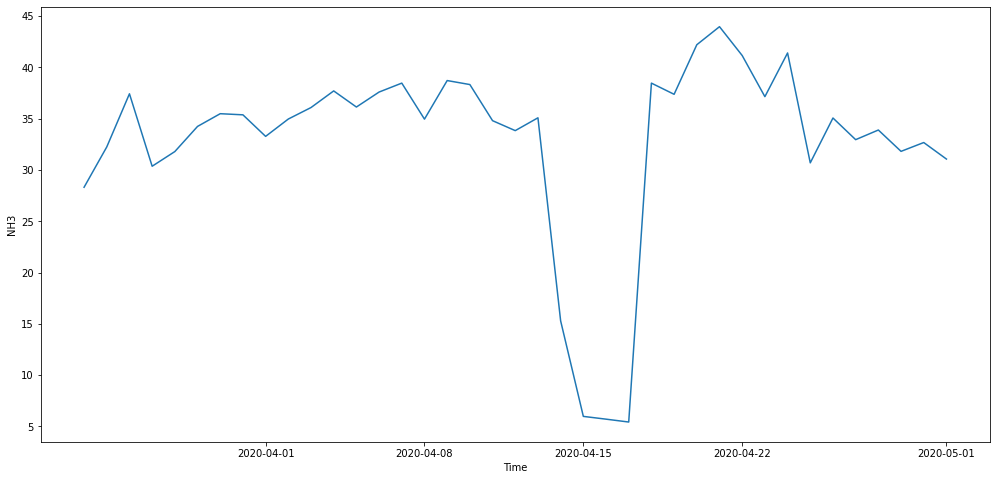

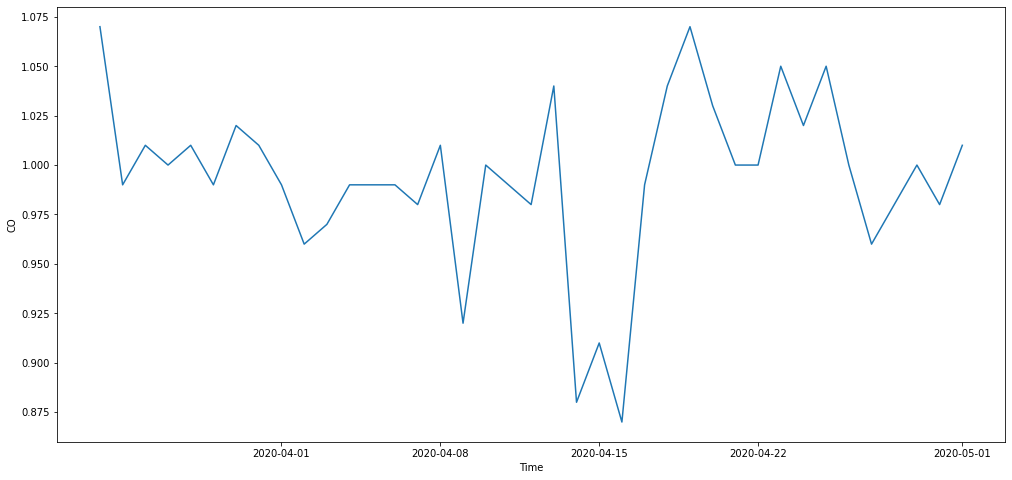

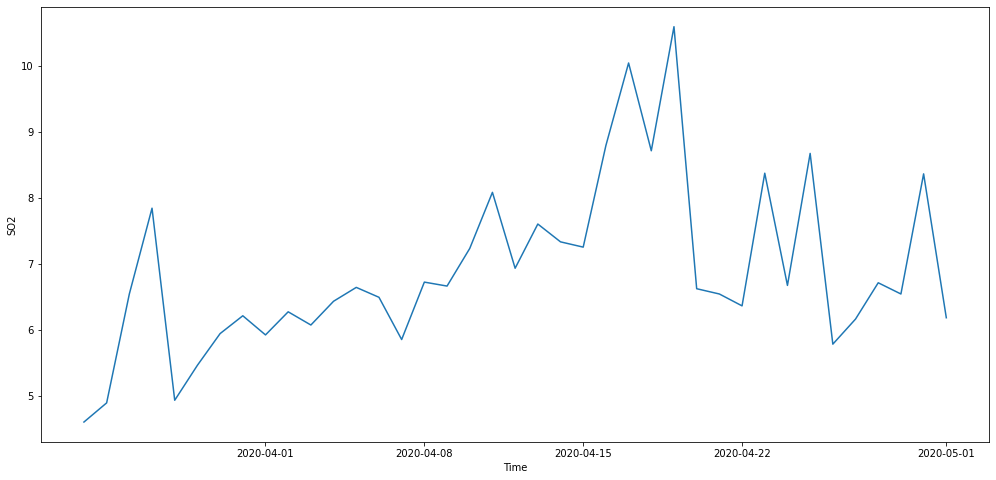

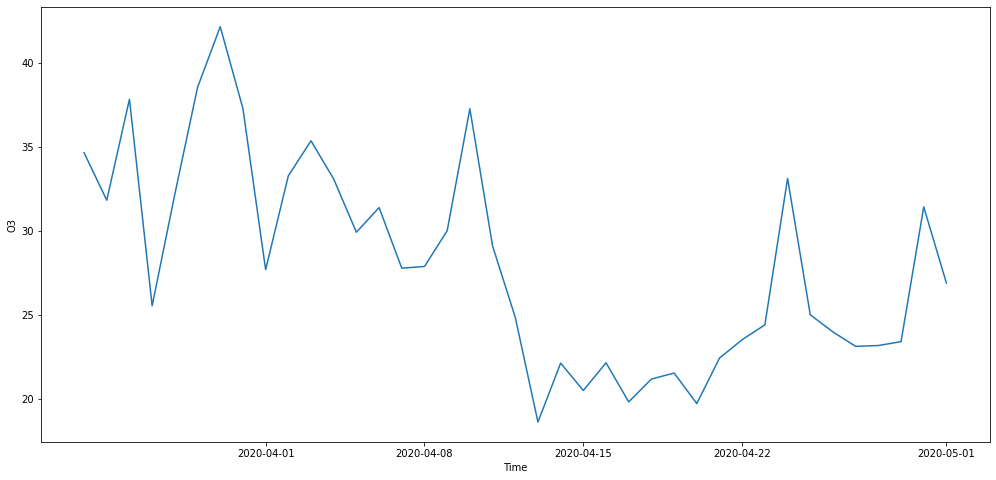

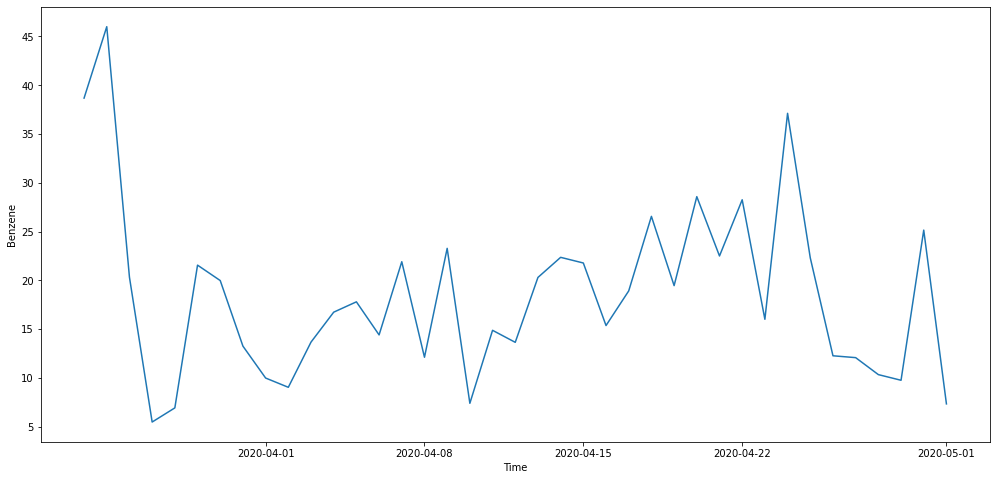

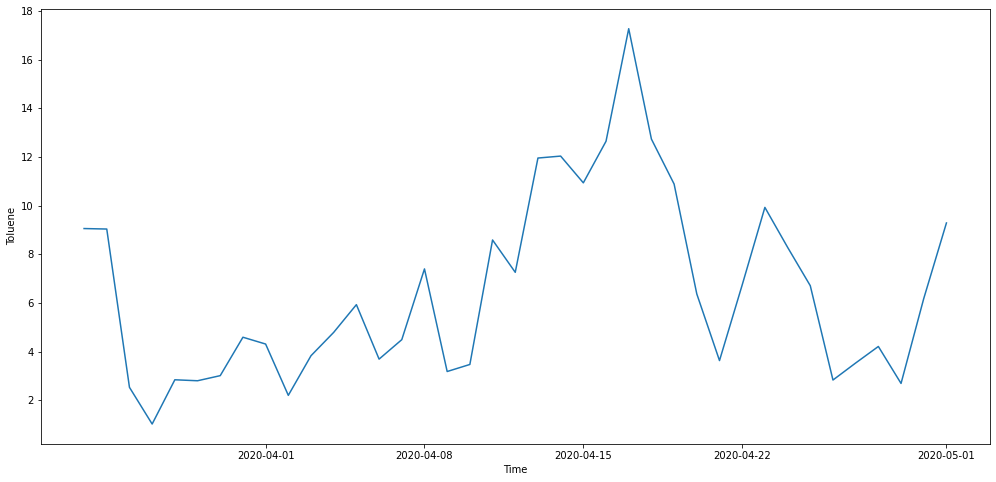

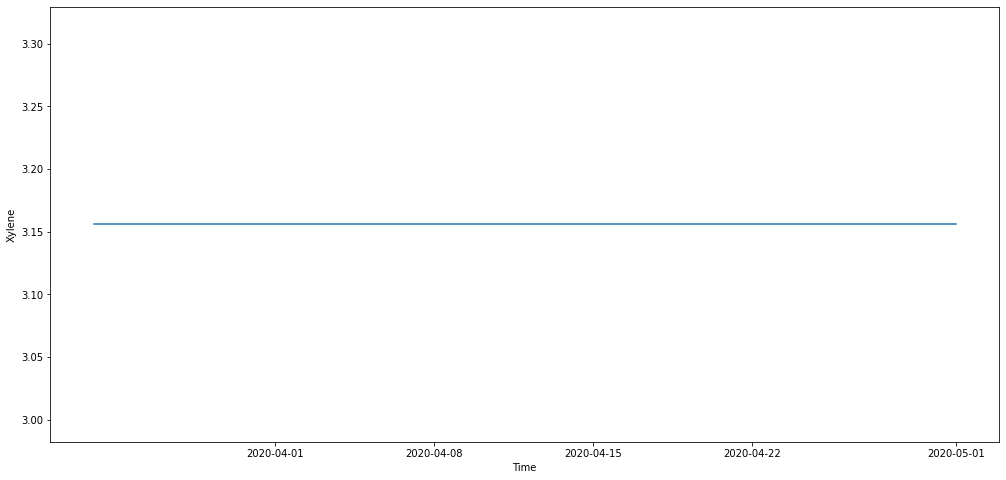

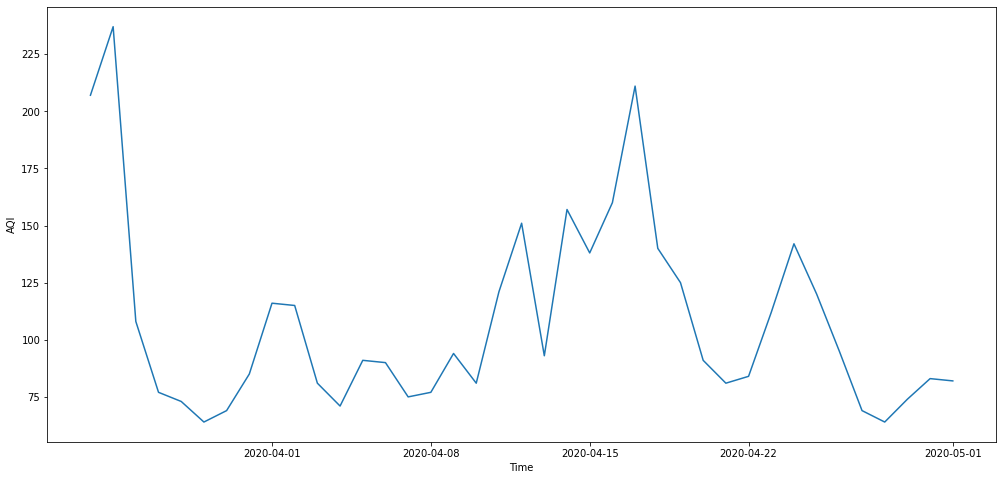

In [40]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df_lucknow_after_covid[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df_lucknow_after_covid.columns:
    plot_data(col)

In [41]:
df_lucknow_after_covid = df_lucknow_after_covid.reset_index()
df_lucknow_after_covid = df_lucknow_after_covid.rename({'Date':'ds','AQI':'y'} , axis = 1)
df_lucknow_after_covid.head(1)

,ds,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,y
0,2020-03-24,100.15,11.93,16.12,17.97,28.31,1.07,4.6,34.65,38.68,9.06,3.155895,207.0


In [0]:
tr  = df_lucknow_after_covid

cols = tr.columns.tolist()

In [0]:
cols = ['ds',
 'y', 
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene'
 ]

In [44]:
tr_nox = tr[['ds','NOx']]
tr_nox = tr_nox.rename({'NOx':'y'},axis=1)
f1 = Prophet()
f1.fit(tr_nox)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future1 = f1.make_future_dataframe(periods= 40 )
forecast1 = f1.predict(future1)
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2020-06-06,8.626856,5.147779,12.172902,8.626467,8.627230,-0.045807,-0.045807,-0.045807,-0.045807,-0.045807,-0.045807,0.0,0.0,0.0,8.581049
75,2020-06-07,8.573213,4.437042,10.989743,8.572807,8.573605,-0.728620,-0.728620,-0.728620,-0.728620,-0.728620,-0.728620,0.0,0.0,0.0,7.844593
76,2020-06-08,8.519571,4.001619,11.050828,8.519149,8.519982,-1.015379,-1.015379,-1.015379,-1.015379,-1.015379,-1.015379,0.0,0.0,0.0,7.504192
77,2020-06-09,8.465929,5.442923,12.001917,8.465494,8.466352,0.533848,0.533848,0.533848,0.533848,0.533848,0.533848,0.0,0.0,0.0,8.999777
78,2020-06-10,8.412287,5.666575,12.544896,8.411835,8.412728,0.623748,0.623748,0.623748,0.623748,0.623748,0.623748,0.0,0.0,0.0,9.036035


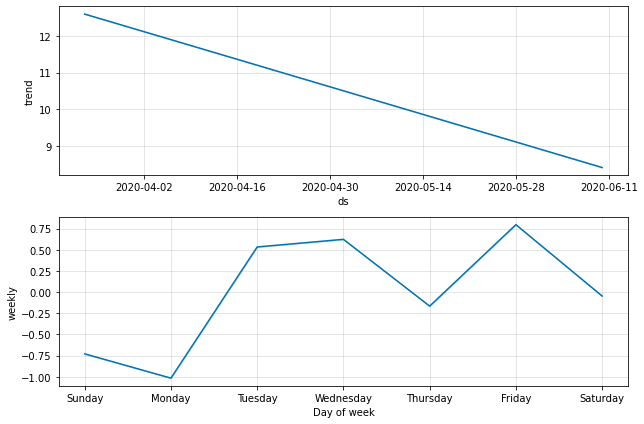

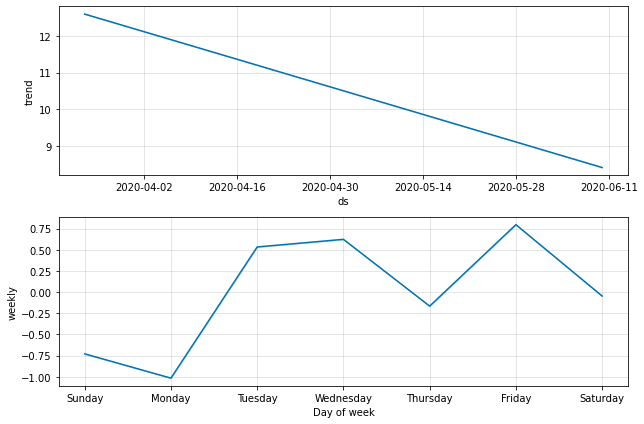

In [46]:
f1.plot_components(forecast1)

In [47]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df1 = make_comparison_dataframe(tr_nox, forecast1)

cmp_df1.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,13.129191,9.721999,16.527304,17.97
2020-03-25,13.165503,9.734942,16.317562,14.18
2020-03-26,12.323395,8.656918,15.576582,9.05
2020-03-27,13.231563,9.940141,16.375140,12.92
2020-03-28,12.335185,8.766661,15.793711,12.15


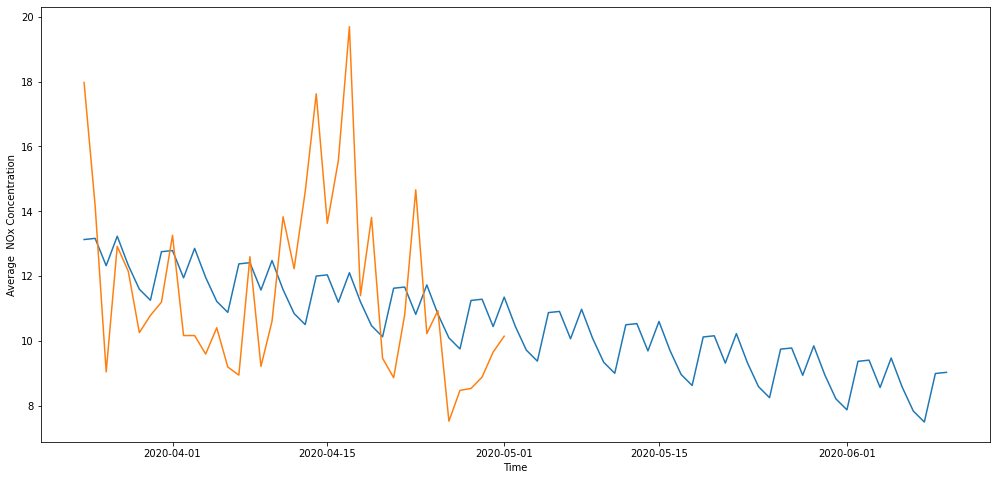

In [48]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df1['yhat'])

plt.plot(cmp_df1['y'])
plt.xlabel('Time')
plt.ylabel('Average  NOx Concentration')
plt.grid(False)
plt.show()

**Now will do analysis for SO2 for before and after covid**

In [0]:
# before first

In [50]:
tr1_so2 = train[['ds','SO2']]
tr1_so2 = tr1_so2.rename({'SO2':'y'},axis=1)
s1 = Prophet()
s1.fit(tr1_so2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future1_so2 = s1.make_future_dataframe(periods= 365 )
forecast1_so2 = s1.predict(future1_so2)
forecast1_so2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
582,2021-03-25,7.670682,5.385941,11.638312,7.584885,7.760148,0.890480,0.890480,0.890480,0.890480,0.890480,0.890480,0.0,0.0,0.0,8.561162
583,2021-03-26,7.670054,5.396140,11.529473,7.583961,7.760133,0.930909,0.930909,0.930909,0.930909,0.930909,0.930909,0.0,0.0,0.0,8.600963
584,2021-03-27,7.669426,5.487455,11.633121,7.583038,7.759814,0.961626,0.961626,0.961626,0.961626,0.961626,0.961626,0.0,0.0,0.0,8.631052
585,2021-03-28,7.668798,5.620679,11.654439,7.581922,7.759756,0.981468,0.981468,0.981468,0.981468,0.981468,0.981468,0.0,0.0,0.0,8.650266
586,2021-03-29,7.668170,5.569572,11.999837,7.580757,7.759756,0.989561,0.989561,0.989561,0.989561,0.989561,0.989561,0.0,0.0,0.0,8.657730


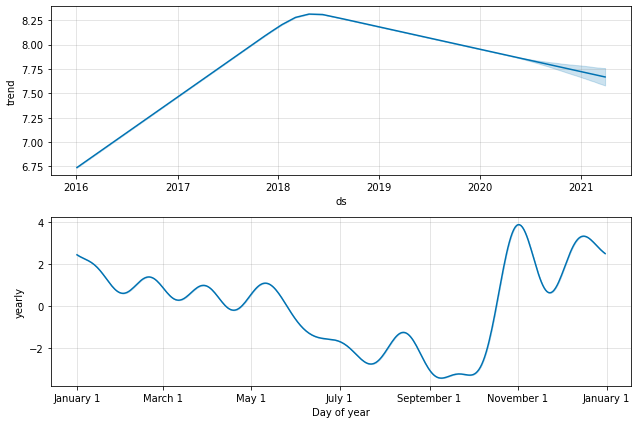

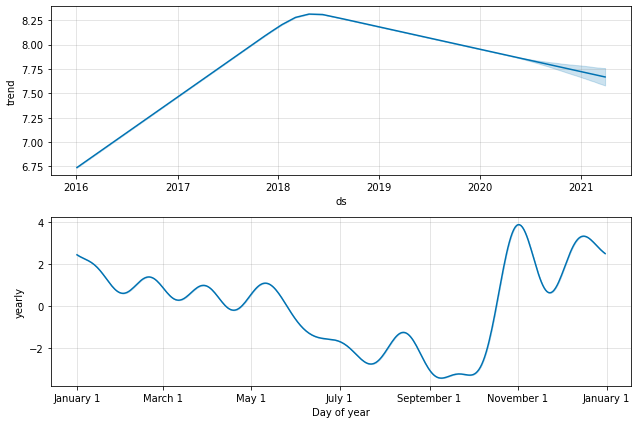

In [52]:
s1.plot_components(forecast1_so2)

In [53]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df1_so2 = make_comparison_dataframe(tr1_so2, forecast1_so2)

cmp_df1_so2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-03,9.127038,6.060841,12.383533,5.613333
2016-01-10,8.897778,5.701127,11.972368,6.698571
2016-01-17,8.512466,5.419077,11.531792,6.637143
2016-01-24,7.897309,4.668208,10.967282,6.840000
2016-01-31,7.445417,4.471522,10.507119,7.941429


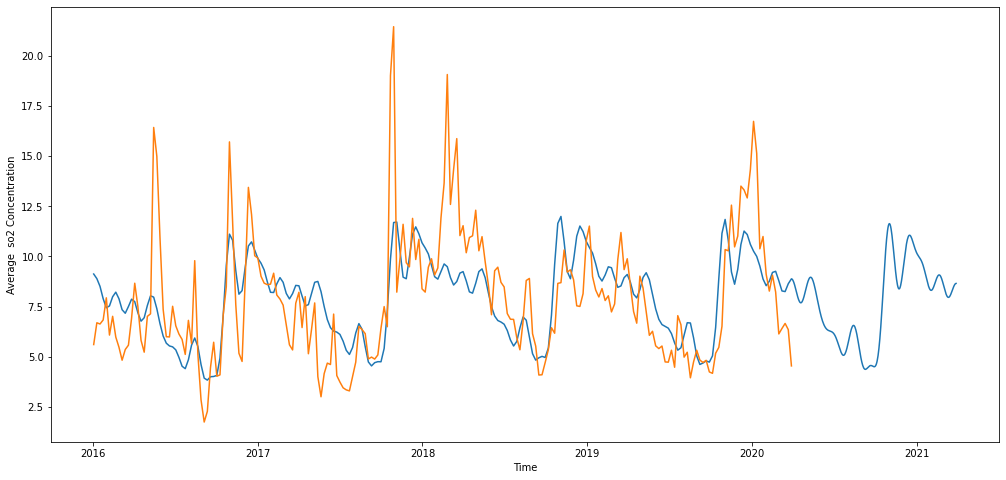

In [54]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df1_so2['yhat'])

plt.plot(cmp_df1_so2['y'])
plt.xlabel('Time')
plt.ylabel('Average  so2 Concentration')
plt.grid(False)
plt.show()

In [0]:
# after covid

In [56]:
tr2_so2 = tr[['ds','SO2']]
tr2_so2 = tr_nox.rename({'SO2':'y'},axis=1)
s2 = Prophet()
s2.fit(tr2_so2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future2_so2 = f1.make_future_dataframe(periods= 40 )
forecast2_so2 = f1.predict(future2_so2)
forecast2_so2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2020-06-06,8.626856,5.262971,11.919116,8.626466,8.627218,-0.045807,-0.045807,-0.045807,-0.045807,-0.045807,-0.045807,0.0,0.0,0.0,8.581049
75,2020-06-07,8.573213,4.474205,11.438160,8.572810,8.573596,-0.728620,-0.728620,-0.728620,-0.728620,-0.728620,-0.728620,0.0,0.0,0.0,7.844593
76,2020-06-08,8.519571,4.116604,11.019473,8.519155,8.519972,-1.015379,-1.015379,-1.015379,-1.015379,-1.015379,-1.015379,0.0,0.0,0.0,7.504192
77,2020-06-09,8.465929,5.628028,12.480433,8.465495,8.466346,0.533848,0.533848,0.533848,0.533848,0.533848,0.533848,0.0,0.0,0.0,8.999777
78,2020-06-10,8.412287,5.594294,12.296395,8.411833,8.412720,0.623748,0.623748,0.623748,0.623748,0.623748,0.623748,0.0,0.0,0.0,9.036035


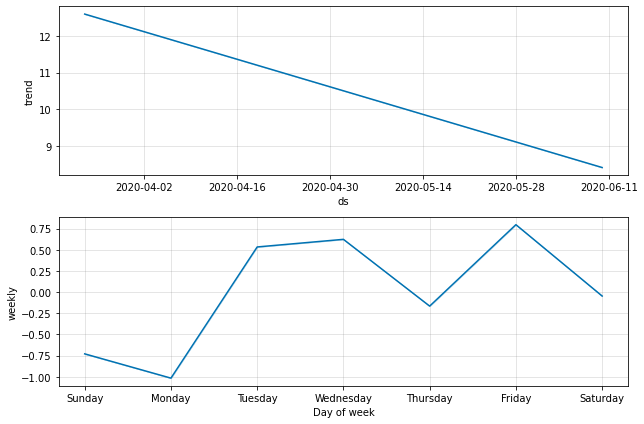

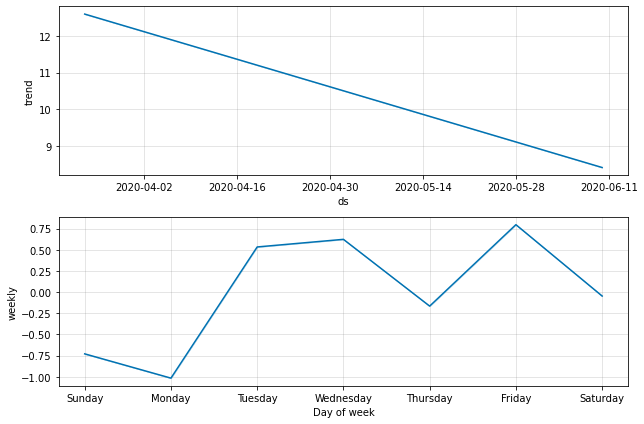

In [58]:
s2.plot_components(forecast2_so2)

In [59]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df2_so2 = make_comparison_dataframe(tr2_so2, forecast2_so2)

cmp_df2_so2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,13.129191,9.907816,16.438250,17.97
2020-03-25,13.165503,9.803447,16.518662,14.18
2020-03-26,12.323395,8.872221,15.918988,9.05
2020-03-27,13.231563,9.977866,16.840212,12.92
2020-03-28,12.335185,8.890023,15.648866,12.15


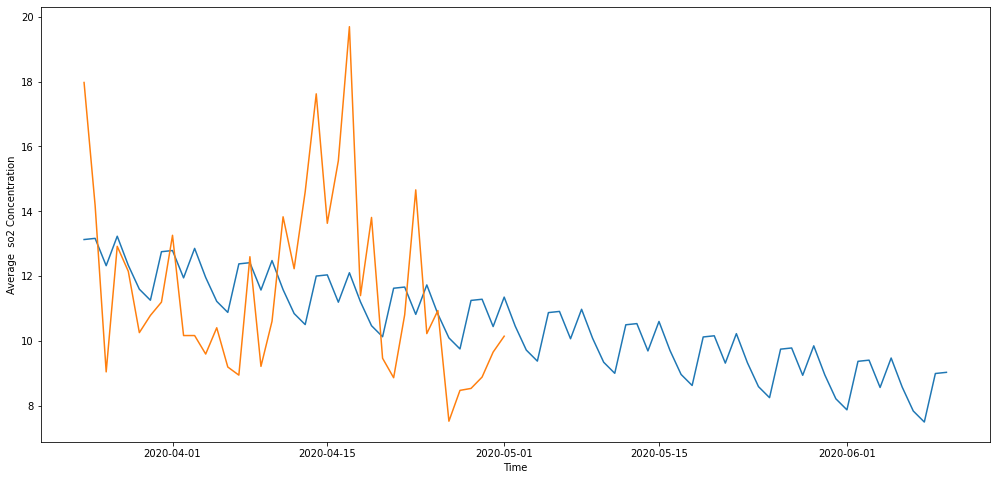

In [60]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df2_so2['yhat'])

plt.plot(cmp_df2_so2['y'])
plt.xlabel('Time')
plt.ylabel('Average  so2 Concentration')
plt.grid(False)
plt.show()